# Ecuación de Bellman, Q y Q-learning

En esta parte del curso veremos un nuevo grupo de métodos, conocidos como métodos Q-learning, que tienen mucha más flexibilidad y poder. Vamos a profundizar en la serie de conceptos básicos que ya vimos cuando estudiamos los procesos de decisión de Markov en la clase anterior, en concreto: **valor** y **estado** y añadiremos alguno nuevo como **optimización**. 




## Valor de estado, estado y optimización

Vamos a refrescar estos conceptos. Recordemos qué entendíamos cómo **valor** y **estado**:

- **Valor**: Se aplica a un estado, y es el conjunto de recompensas (descontadas por gamma $\gamma$, o no) que esperábamos obtener a largo plazo. Recordemos el esquema de las manzanas. Para mí tiene sentido ir a clase porque espero en un futuro obtener un trabajo que me reporte unos ingresos. El valor siempre está vinculado a una **política**, una estrategia que seguir, no es lo mismo que vaya a clase a mirar por la ventana que a prestar atención y ser un estudiante aplicado. Evidentemente espero obtener mejores recompensas en el segundo caso --> Hoy ahondaremos en cómo nuestras acciones influyen en el valor de un estado.

- **Estado**: Es el punto o situación en el que se encuentra el agente en cada momento. En nuestro símil el estado inicial sería el aula.  Otro estado con otro tipo de recompensa esperada a largo plazo puede ser el sofá, por ejemplo.

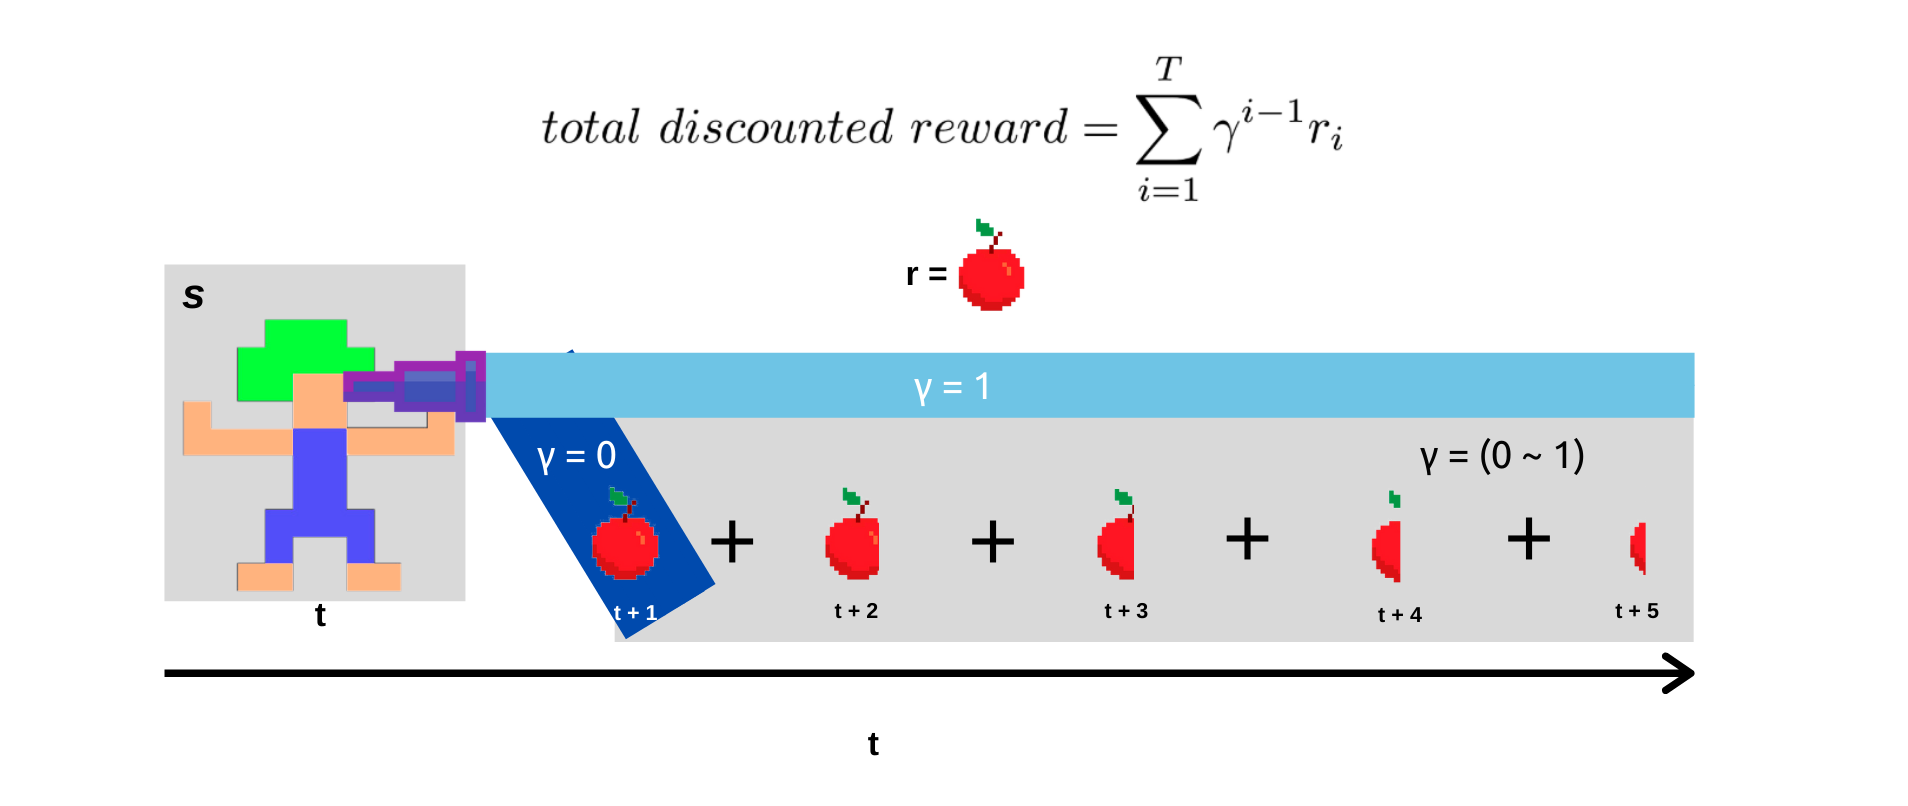

### Recordemos el concepto de valor en MRP

El valor de un estado se corresponde con la recompensa que esperamos obtener a largo palzo desde ese estado. Incluímos un factor **gamma** que determina "cuán a largo plazo" miramos en el futuro para calcular esa recompensa. Cuando estudiamos en la clase anterior los *Procesos de Recompensa de Markov* o *MRP* veíamos que, para **$\gamma$ = 0**, un estado debía su valor a la probabilidad de transición de ese estado al siguiente y el valor intrínseco de esa transición. Recordemos:

**Valor de estado en MRP (Reminder):**

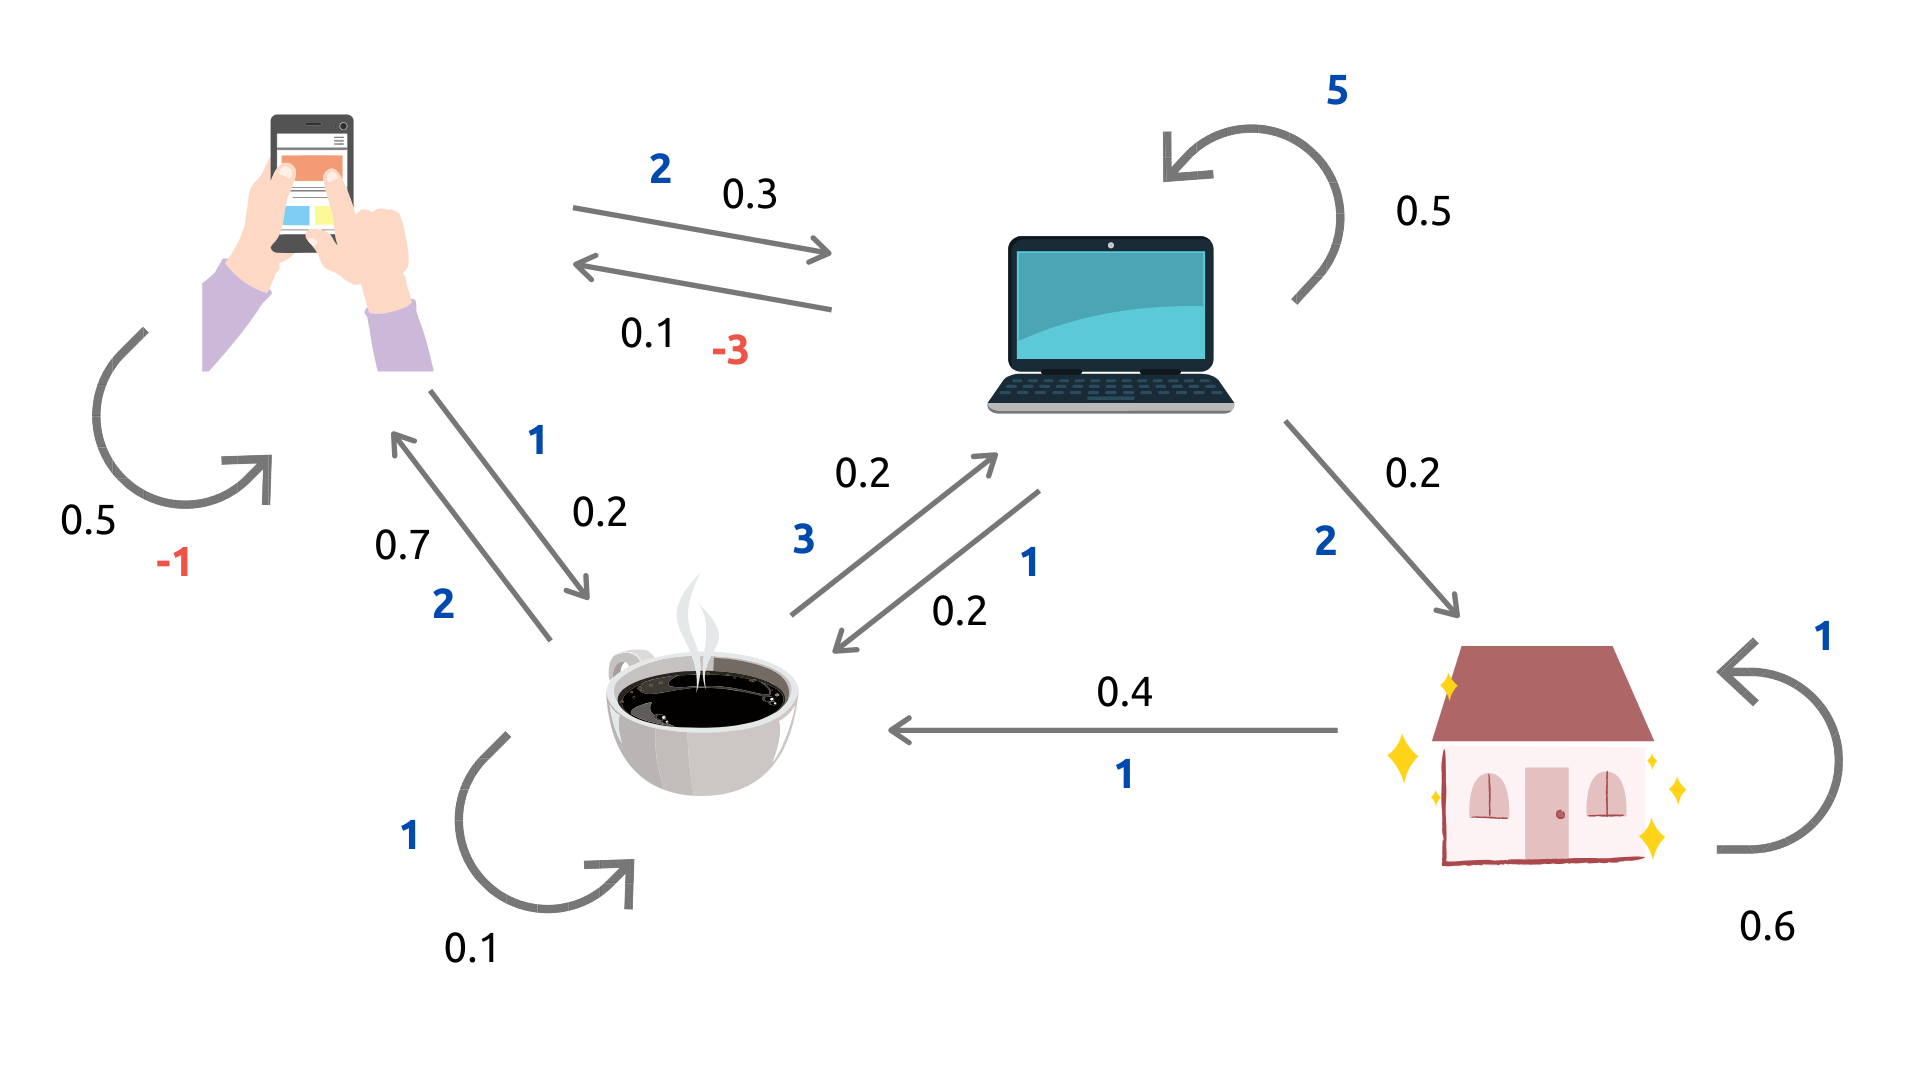

<img src="https://miro.medium.com/max/4672/1*Jix2ScBmffb1e5MpZCiwMg@2x.png" width=500 />


Para **$\gamma$ = 0** el valor de cada estado es:

*V(chatear) = -1 * 0.5 + 2 * 0.3 + 1 * 0.2 = 0.3*\
*V(café) = 2 * 0.7 + 1 * 0.1 + 3 * 0.2 = 2.1*\
*V(casa) = 1 * 0.6 + 1 * 0.4 = 1.0*\
*V(ordenador) = 5 * 0.5 + (-3) * 0.1 + 1 * 0.2 + 2 * 0.2 = 2.8*

Para **$\gamma$ = 1** el valor de cada estado tiende a infinito pues este entorno no tiene un estado final.



### Veamos el concepto de valor en MDP

Sin embargo, ya vimos que en los *Procesos de Recompensa de Markov* **no** se ejecutan acciones, y por lo tanto no podemos influir en el estado a alcanzar. El concepto de **Procesos de Decisión de Markov** o **MDP** nace de incluir a los MRP la habilidad de tomar decisiones basadas en las recompensas esperadas. Veamos en un simple ejemplo **cómo nuestras acciones inciden en el valor de los estados** en los que no encontramos:

<img src=resources/mdp_action_I.png width=500 />

Este entorno es determinista, es decir, el agente tiene una probabilidad del 100% de alcanzar el estado que pretende. Una vez alcanzado el estado 2 o 3 (estados finales) el agente recibe la recompensa marcada y el episodio termina. Ahora la pregunta es **¿Cuál es el valor del estado 1?** En este caso la respuesta no tiene sentido sin la información relativa al comportamiento de nuestro agente, es decir, **no tiene sentido responder a esta pregunta sin una política** (sin una serie de "reglas" a seguir para saber qué acción ejecutar en el estado actual).

**¿Y cual es esa política?** La respuesta rápida es que hay un número infinito de ellas, veamos algunas: 

- **Pol_1**: El agente va siempre a la derecha
- **Pol_2**: El agente va siempre hacia abajo
- **Pol_3**: El agente va  un 50% de las veces abajo y un 50% a la derecha
- **Pol_4**: El agente va un 10% de las veces a la derecha y un 90% hacia abajo

Para mostrar **cómo se calcula el valor en MDP** veamos el caso de las anteriores políticas. Como el entorno es pequeño y existen estados finales (el entorno es finito) vamos a suponer un $\gamma = 1$.

<br>
<br>
<img src="https://miro.medium.com/max/4672/1*Jix2ScBmffb1e5MpZCiwMg@2x.png" width=300 />
<br>
<br>

- **$V1_{Pol_1}$**: La recompensa es siempre de **1**, por tanto el valor del estado 1 con la política 1 es de **1**.
- **$V1_{Pol_2}$**: La recompensa es siempre de **2**, por tanto el valor del estado 1 con la política 2 es de **2**.
- **$V1_{Pol_3}$**: El valor del estado 1 con la política 3 es: 0.5 * 1 + 0.5 * 2 = **1.5**
- **$V1_{Pol_4}$**: El valor del estado 1 con la política 4 es: 0.1 * 1 + 0.9 * 2 = **1.9**

Aquí entra en juego el último concepto que veíamos al inicio: **optimización**. Veamos **¿Cual es la política óptima?**, recordemos que el objetivo del agente es **maximizar la recompensa a largo plazo**, por tanto, para este caso la **política óptima** es, evidentemente, la segunda política: **siempre hacia abajo**.

Sin embargo, normalmente los entornos no son tan simples y la política óptima no es tan obvia. Por el ejemplo anterior quizá haya una falsa sensación de que siempre debemos tomar la acción con la recompensa más alta, pero esto no siempre se da. Para ejemplificarlo mejor vamos a **añadir un estado más** a nuestro entorno, pero con una **recompensa negativa** de -20.

<img src=resources/mdp_action_II.png width=500 />


Veamos en esta ocasión cómo se calcula el valor para el estado 1:

- **$V1_{Pol_1}$**: El valor del estado 1 con la política "siempre a la derecha" es el mismo = **1**.
- **$V1_{Pol_2}$**: El valor del estado 1 con la política "siempre hacia abajo" 2 es de: 2.0 - 20 = **-18**.
- **$V1_{Pol_3}$**: El valor del estado 1 con la política "50/50" es: 0.5 * 1 + 0.5 * (2.0 + (-20)) = **-8.5**
- **$V1_{Pol_4}$**: El valor del estado 1 con la política "10/90" es: 0.1 * 1 + 0.9 * (2.0 + (-20)) = **-16.1**

Por tanto ahora la mejor política es la primera, siempre a la derecha, a pesar de que la recompensa inmediata desde el estado 1 es más baja que con respecto a las demás políticas. Estos entornos simples nos ayudan a visualizar el concepto de *optimización* más facilmente y nos llevan a la siguiente gran clave del aprendizaje por refuerzo: la **ECUACIÓN DE BELLMAN**.

# La Ecuación de Bellman

La **ecuación de Bellman** nos permite calcular de manera recursiva el valor de cada estado del entorno en el que estamos.

El valor de un estado 's' es igual a la recompensa inmediata 'r' más el valor del estado alcanzado $V(s')$ obtenidos tras ejecutar la acción que maximiza dicha suma. Como sabemos que el valor de un estado es equivalente a la recompensa que esperamos obtener a futuro desde ese estado podemos leer la fórmula tambíen de la siguiente manera.

El valor de un estado es igual a la recompensa obtenida más la recompensa que esperamos obtener a largo plazo desde el siguiente estado siguiendo la política, es decir, escogiendo en el estado s un acción a, que maximiza las recompensas que esperamos obtener.

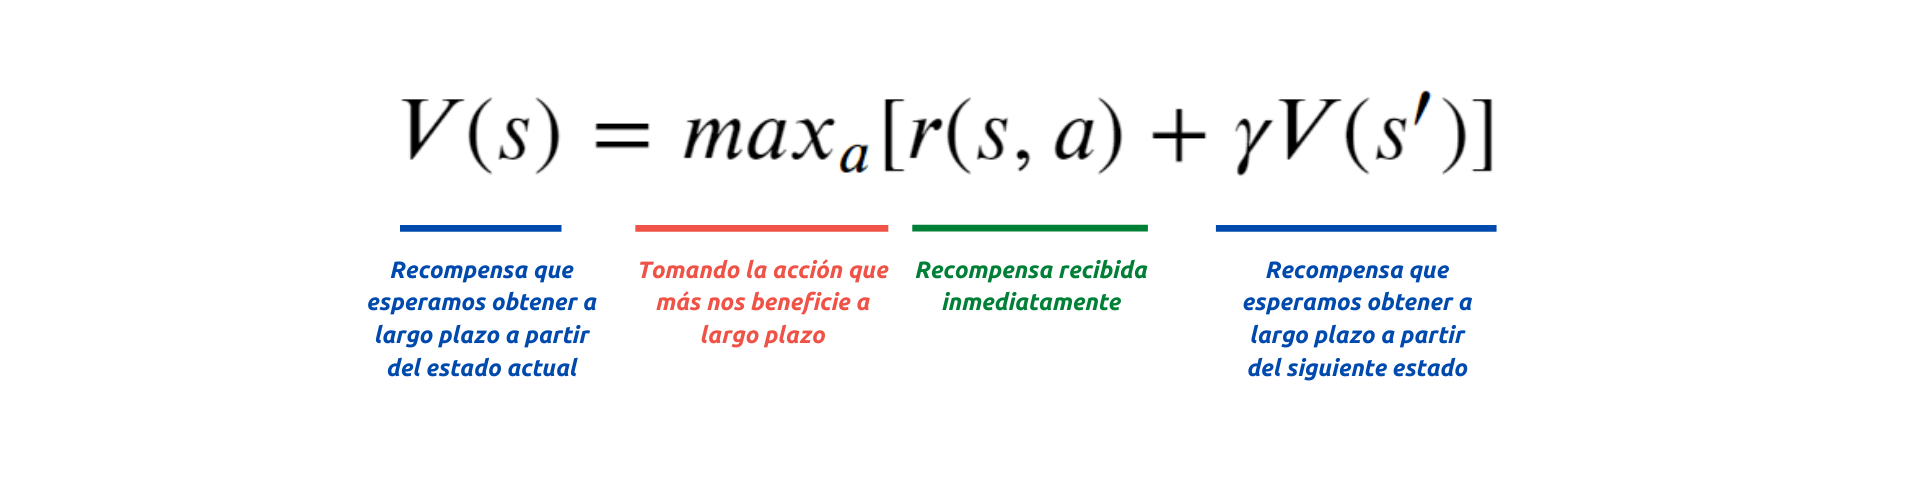

## Entorno Determinista

Para explicar la ecuación de Bellman vamos a ponernos un poco abstractos. Imaginemos de nuevo un **entorno determinista**, en el que cada acción tiene un 100% de probabilidad de éxito, es decir, que nos lleva al estado que pretendemos. 

- El agente se encuentra en el estado inicial $s_{0}$ (start).
- Su espacio de acción consiste en *N* posibles acciones.
- Esas acciones llevan a *N* estados: $s_{1}$, $s_{2}$, $s_{3}$,... $s_{N}$. 
- De esas transiciones obtenemos una recompensa *r* que varía según el estado alcanzado: $r_{1}$, $r_{2}$, $r_{3}$,... $r_{N}$.
- Y cada uno de esos N estados conectados con $s_{0}$ tiene su propio valor de estado $V_{i}$.

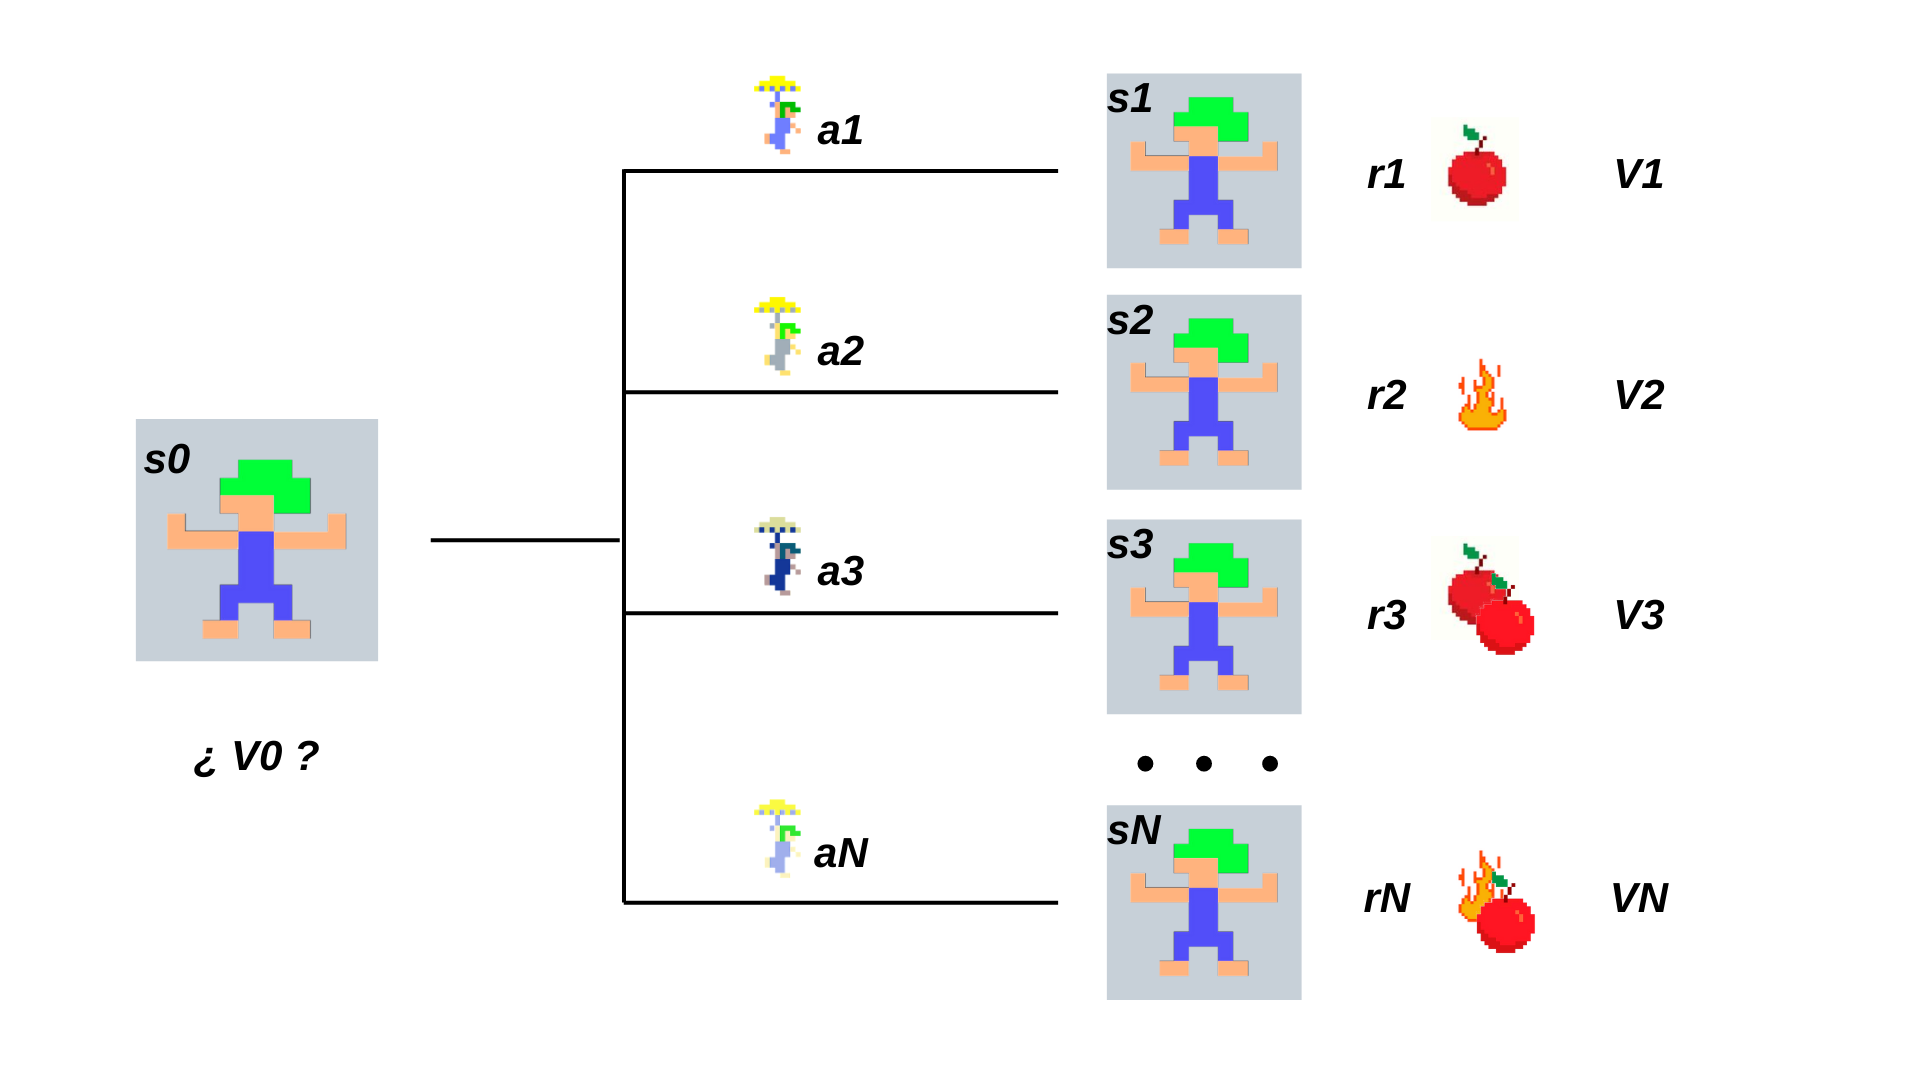

En esta situación **el valor del estado $s_{0}$ para cada acción** consiste en la recompensa inmediata obtenida de la ejecución de dicha acción más la recompensa esperada a largo plazo de alcanzar el nuevo estado (su valor):

<h2><center>$V_{0}(a = a_{i}) = r_{i} + V_{i} $</center></h2>

Así que, para elegir la mejor acción posible en el estado $s_{0}$, es necesario *calcular los valores resultantes para todas las posibles acciones y tomar de ellas la que maximice el valor de $V_{0}$*. En otras palabras, **$V_{0}$ es igual al valor máximo posible del conjunto de acciones posibles para $V_{0}$**:

<h1><center>$V_{0} = max_{a \in 1... N}(r_{a} + V_{a}) $</center></h1>

Si añadimos nuestro factor de descuento $\gamma$ a la ecuación (cuánto de lejos queremos "mirar" en el futuro) obtenemos la **ecuación de Bellman**, cuyo creador, *Richard Belman* probó que **convergía al comportamiento óptimo** de nuestro agente, es decir, que a través de dicho comportamiento obtendríamos el mejor resultados posible .

<h1><center>$V_{0} = max_{a \in 1... N}(r_{a} + \gamma V_{a}) $</center></h1>

## Entorno Estocástico

Extender la ecuación de Bellman al **entorno estocástico**, en el que hay una probabilidad de acabar en un estado distinto al que pretendíamos con nuestra acción. Imaginemos el siguiente caso en el que ejecutamos un acción $a_{1}$ que puede terminar en tres estados distintos con tres probabilidades distintas: con una probabilidad $p_{1}$ acabamos en el estado $s_{1}$, con una probabilidad $p_{2}$ acabamos en el estado $s_{2}$ y con una probabilidad $p_{3}$ acabamos en el estado $s_{3}$, donde $p_{1}$ + $p_{2}$ + $p_{3}$ = 1. Cada estado tiene su propia recompensa $r_{1}$, $r_{2}$ y $r_{3}$ y su propio *Valor* $V_{1}$, $V_{2}$ y $V_{3}$.

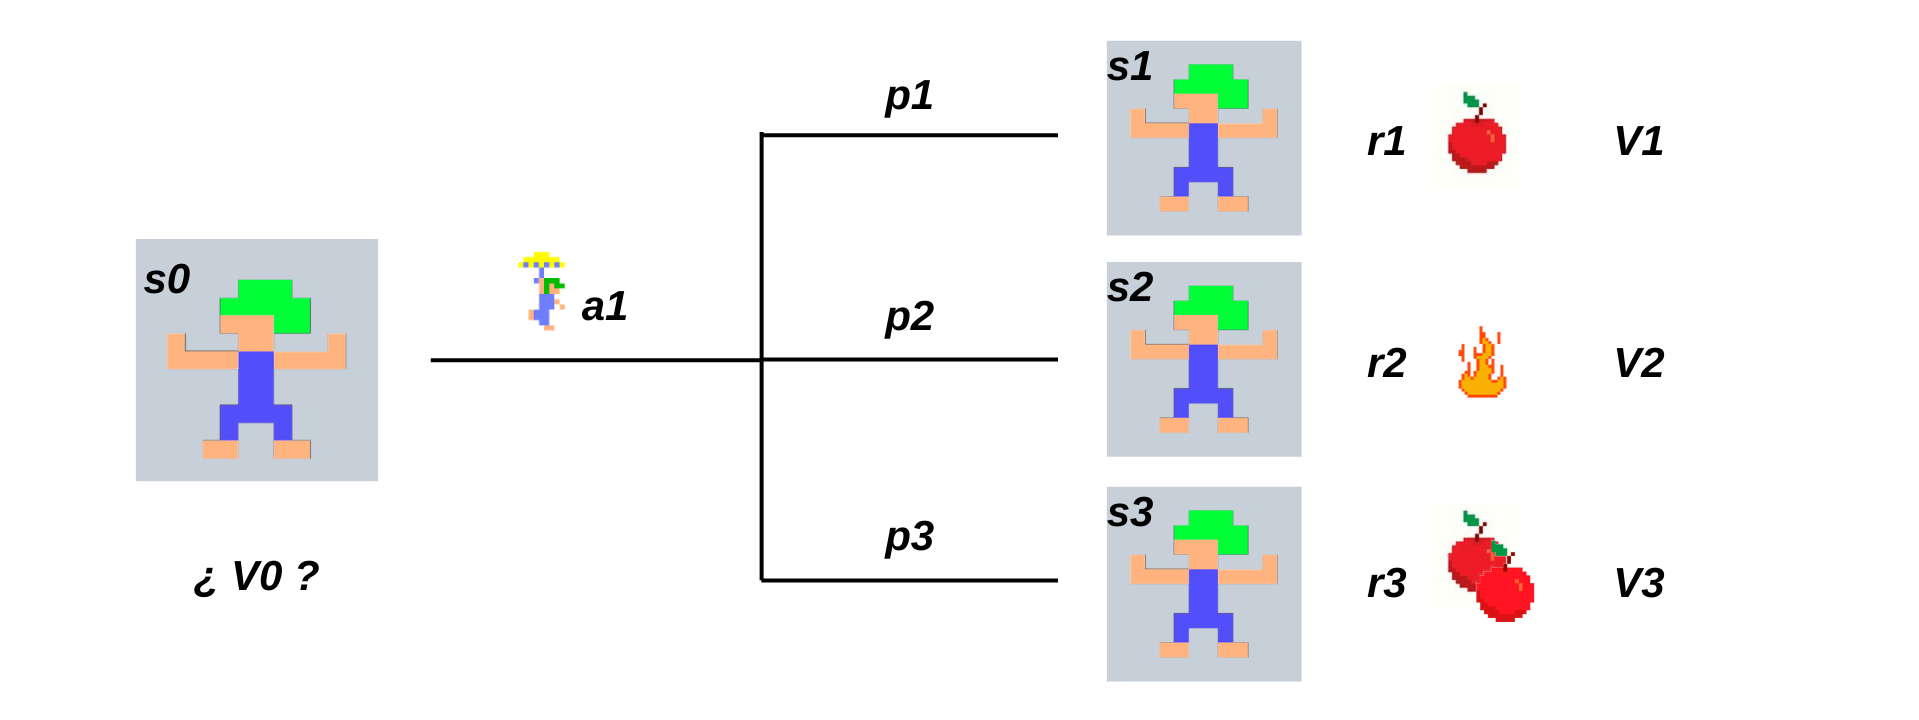

Por tanto, el valor del **estado 0** para la **acción 1** en un entorno estocástico es el siguiente:

<h2><center>$V_{0}(a = 1) = p_{1}(r_{1} + \gamma V_{1}) + p_{2}(r_{2} + \gamma V_{2}) + p_{3}(r_{3} + \gamma V_{3}) $</center></h2>

O más formalmente:

<h2><center>$$V_{0}(a) = \sum_{s \in S} p_{a,0 \rightarrow s}(r_{s,a} + \gamma V_{s})$$</center></h2>

Siendo $p_{a,i \rightarrow s}$ la probabilidad de acabar en un estado *s* ejecutando la acción *a* en un estado *i*. Recordemos que debemos realizar este cálculo **para todas las posibles acciones** (*a = 1,2,3...N*) para así elegir la acción que maximice el valor de $V_{0}$. Por tanto, el valor $V_{0}$ para un entorno estocástico según la **ecuación de Bellman** es la siguiente:

<h1><center>$$V_{0} = \max_{a \in A} \sum_{s' \in S} p_{a,0 \rightarrow s'}(r_{0,a} + \gamma V_{s'})$$</center></h1>

En el dibujo inferior podemos ver visualmente cómo se calcularía el valor del estado 0 para cada una de sus acciones [V0(a1), V0(a2), V0(a3), V0(a4)]. El valor del estado 0 correspondería con el valor más alto de todos ellos max[V0(a1), V0(a2), V0(a3), V0(a4)]. En este entorno estocástico existe una probabilidad p2 de acabar a la izquierda de donde originalmente queríamos ir y una probabilidad p3 de acabar a la derecha de donde originalmente queríamos ir.

<img src=resources/q_and_v_II.png  width=600/>

La idea por detrás sigue siendo la misma: el valor de un estado es igual al de la acción que maximiza la suma de la recompensa inmediata *r* más la recompensa descontada a largo plazo *$\gamma V_{s'}$* esperada para el próximo estado . Este tipo de recursividad, en la que el valor de un estado depende del siguiente, es una práctiva muy común en problemas de optimización. Si nuestro agente conoce los valores de los estados entonces automáticamente obtenemos su política óptima ya que conocemos para todos los estados cual es la acción que maximiza la recompensa. 

Viendo cómo el valor de una acción influye directamente en el valor del estado donde es ejecutada damos paso a uno de los grandes conceptos en el campo del aprendizaje por refuerzo: **Q-Learning**.

# Q: El valor de la acción

Del valor del estado **$V_{s}$** podemos definir un concepto más potente: **el valor de una acción *a* ejecutada en el estado *s*** se denota de la siguiente manera: 

<h2><center>$Q_{s, a}$</center></h2>

Básicamente se entiende como la recompensa total a largo plazo que podemos esperar de ejecutar dicha acción en dicho estado. Este concepto da pie a una familia entera de algoritmos conocida como **Q-learning**. Y todos ellos basan su teoría en mapear los valores de Q para cada par *estado/acción*. 

<h1><center>$$Q_{s, a} = \sum_{s' \in S} p_{a,s \rightarrow s'}(r_{s,a} + \gamma V_{s'})$$</center></h1>

Si has estado atent@ podrás observar que esta función es exactamente la misma que veíamos antes en la ecuación de Bellman cuando queríamos calcular el valor del estado 0 para la acción '*a*'. Por tanto también podemos definir el valor de un estado **$V_{s}$** a través de **$Q_{s, a}$**:

<h1><center>$$V_{s} = \max_{a \in A} Q_{s, a}$$</center></h1>

<img src=resources/q_and_v.png  width=400/>

**$V_{s}$** *es igual al valor de la acción que maximiza la recompensa*. Esta definición es muy similar a la definición de valor de estado vista en la ecuación de Bellman. Finalmente podemos definir $Q_{s, a}$ a través de sí mismo de manera recursiva:

<h1><center>$$Q(s, a) = r_{s, a} + \gamma\max_{a' \in A} Q_(s', a')$$</center></h1>

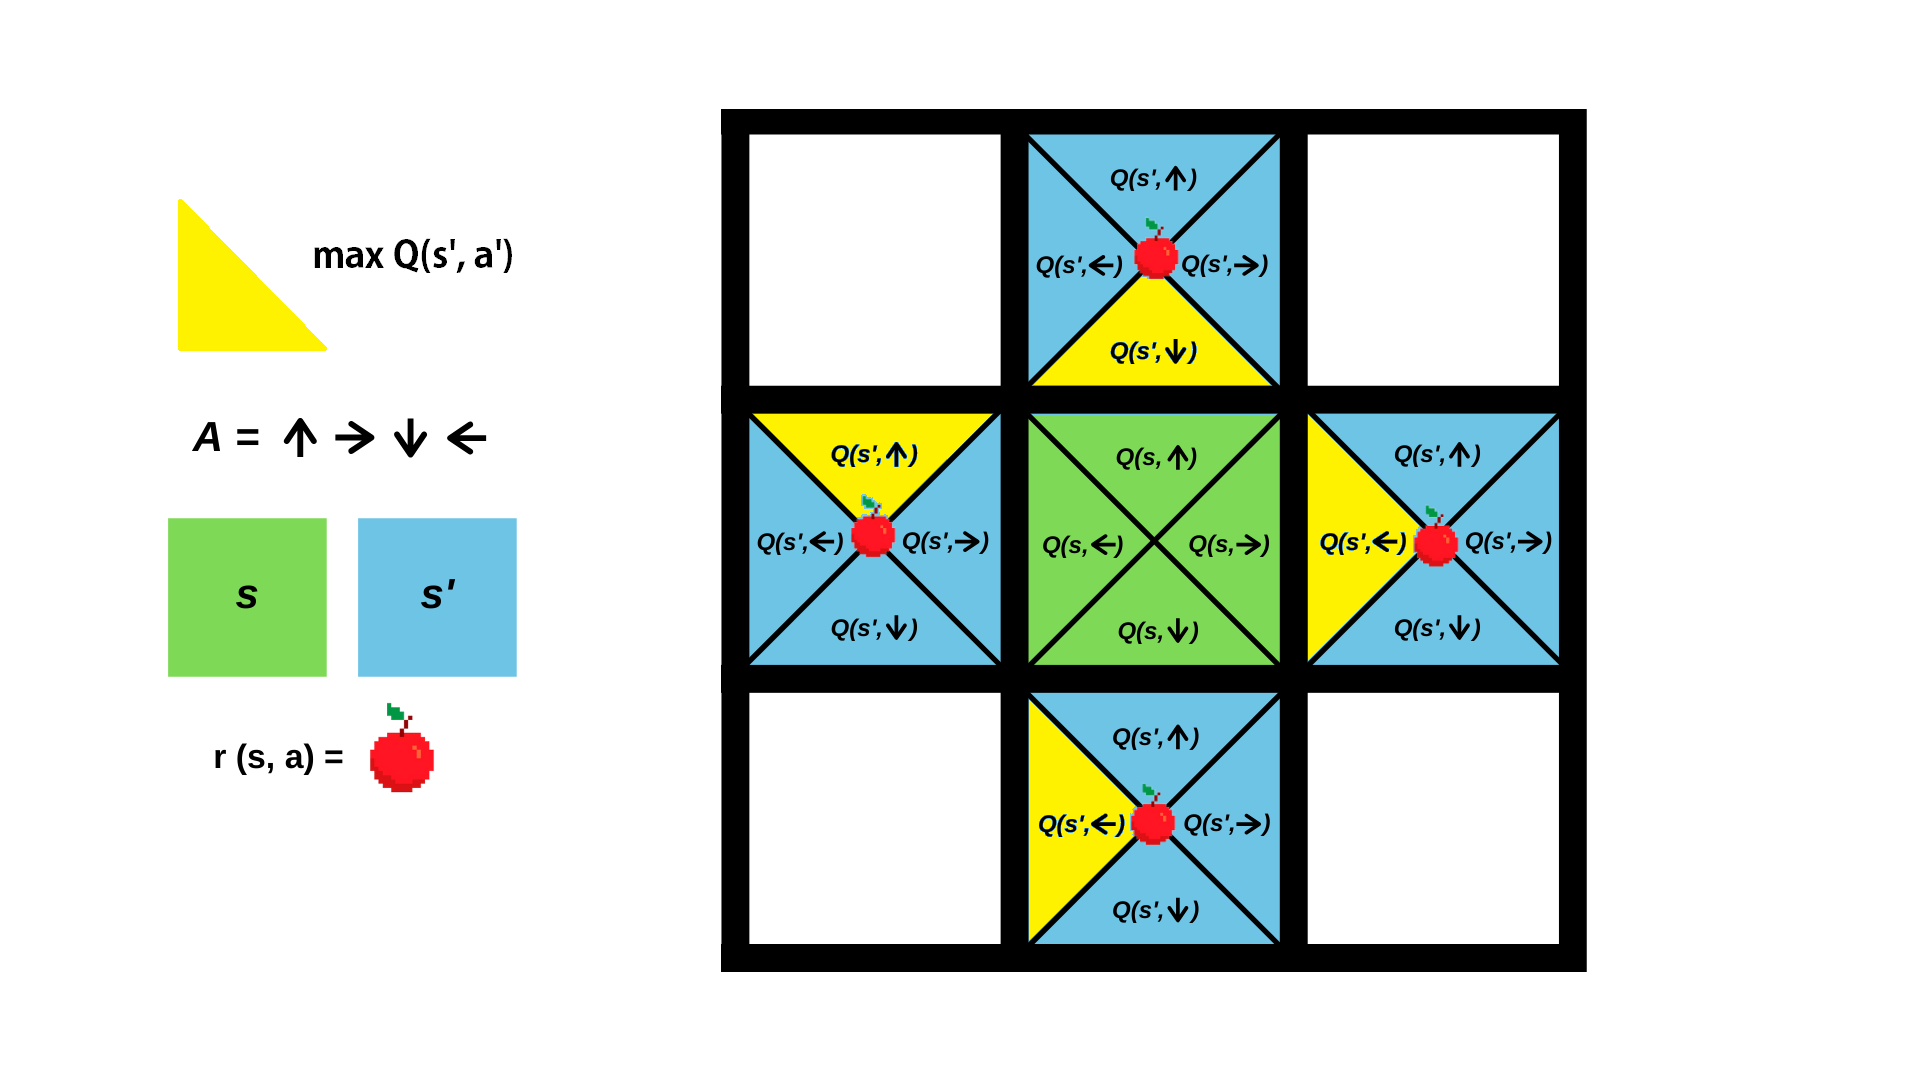

**Ejemplo:**

Veamos como **calcular los valores de las acciones** para el siguiente caso de entorno estocástico: partimos de un estado incial $s_{0}$ conectado con cuatro estados finales $s_{1}$, $s_{2}$, $s_{3}$ y $s_{4}$. **Dado que son estados finales el valor de Q para todas sus acciones es cero** y por tanto el valor de estado corresponde a la recompensa inmediata obtenida al alcanzar dichos estados: $V_{1} = 1, V_{2} = 2, V_{3} = 3$ y $V_{4} = 4$ (suponemos $\gamma = 1$):

<h3><center>$$Q_{s, a} = \sum_{s' \in S} p_{a,s \rightarrow s'}(r_{s,a} + \gamma V_{s'})$$</center></h3>

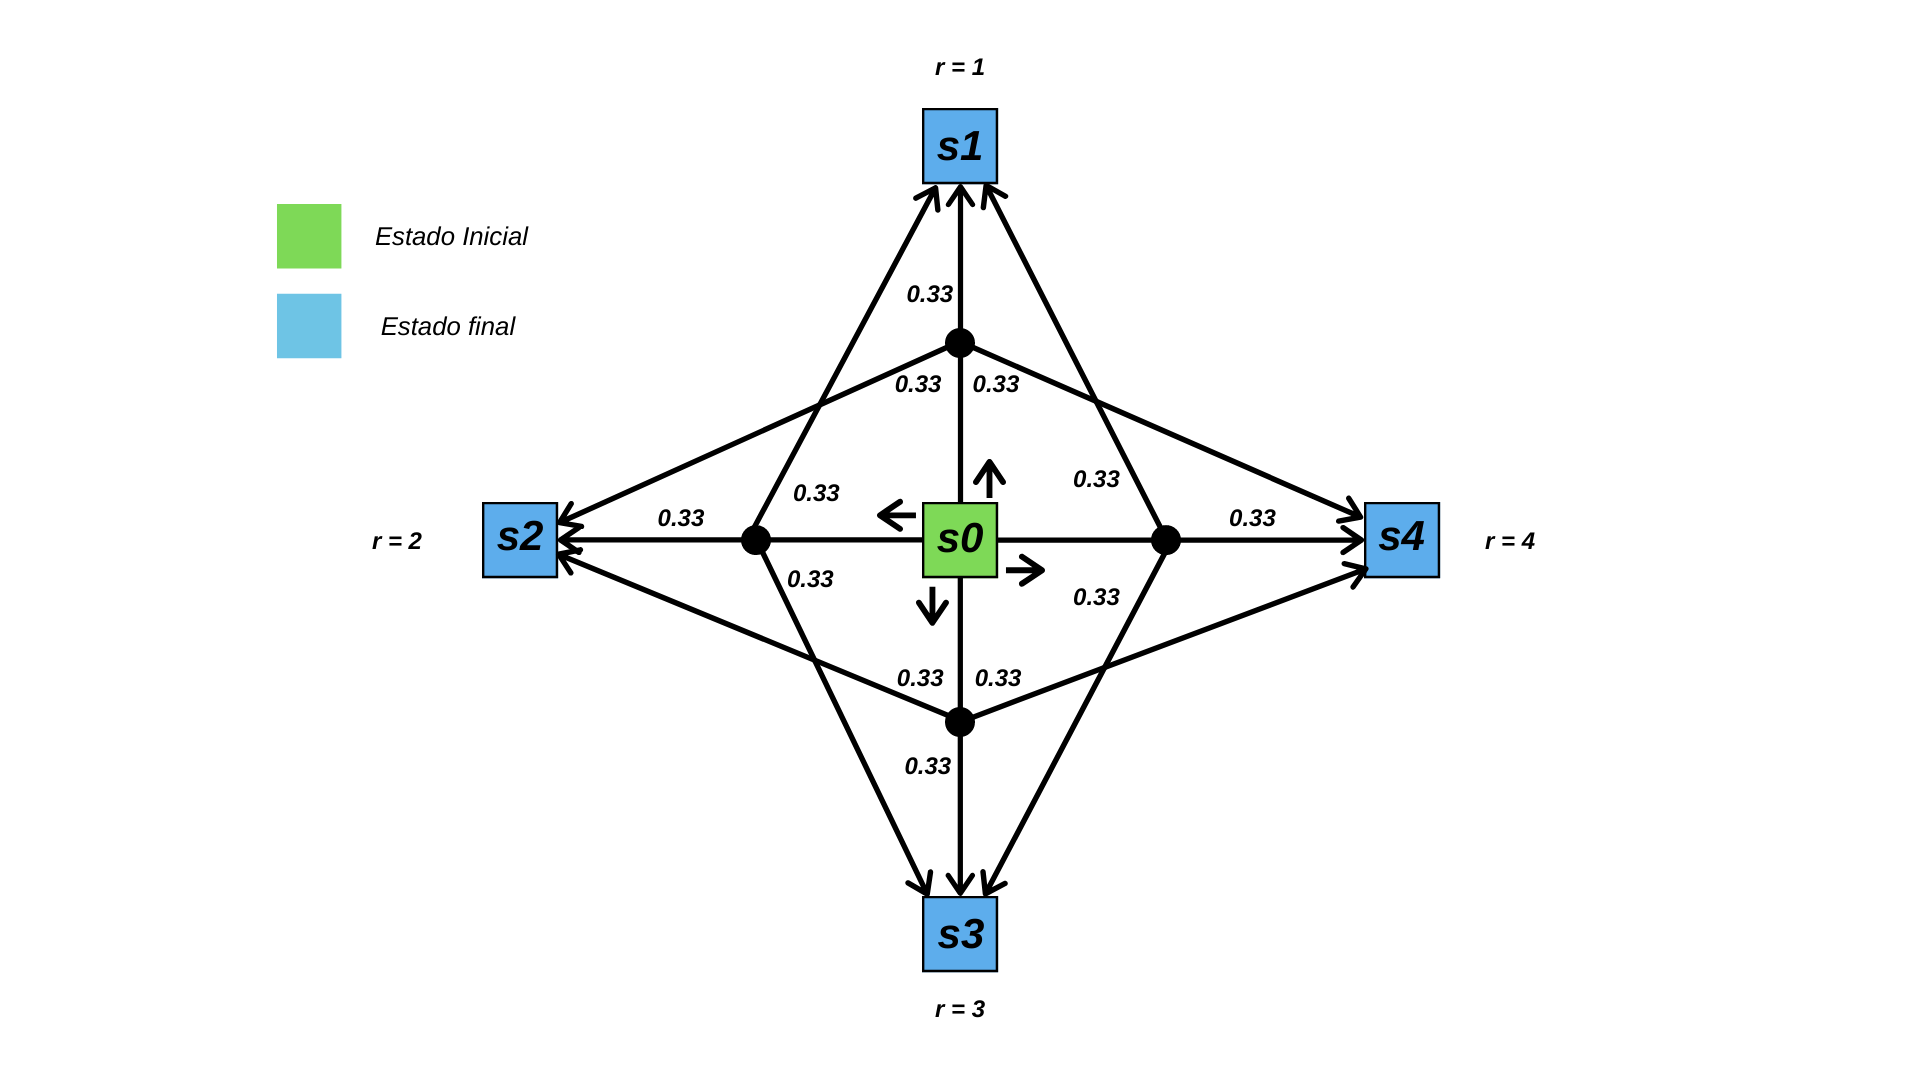

Veamos ahora cómo calcular $V_{0}$ ya que es un poco más complejo:

- $Q(s_{0}, arriba) = 0.33 · V_{1} + 0.33 · V_{2} + 0.33 · V_{4} = 0.33 · 1 + 0.33 · 2 + 0.33 · 4 = 2.31$
- $Q(s_{0}, izquierda) = 0.33 · V_{1} + 0.33 · V_{2} + 0.33 · V_{3} = 0.33 · 1 + 0.33 · 2 + 0.33 · 3 = 1.98$
- $Q(s_{0}, derecha) = 0.33 · V_{1} + 0.33 · V_{3} + 0.33 · V_{4} = 0.33 · 1 + 0.33 · 3 + 0.33 · 4 = 2.64$
- $Q(s_{0}, abajo) = 0.33 · V_{2} + 0.33 · V_{3} + 0.33 · V_{4} = 0.33 · 2 + 0.33 · 3 + 0.33 · 4 = 2.97$

$V_{0}$ corresponde al $Q(s, a)$ cuya acción maximiza la recompensa, por tanto  $V_{0} = 2.97$.

Los valores de Q son más útiles en la práctica, ya que **para el agente es más fácil tomar decisiones basándose en Q(s,a) que en V(s)**. ¿La diferencia? Cuando utilizamos Q el agente tan sólo tiene que calcular el valor de Q para cada acción y tomar la que obtenga el resultado más alto, mientras que, **con los valores de estado, es necesario conocer**, no solo los valores de los estados destino, sino también su **probabilidad de transición**. Dicha probabilidad es raramente conocida de antemanto y será el agente el que deba estimar dichas transiciones para cada par estado/acción.
<br>
<br>

**Ejemplo de por qué conocer Q es más útil que conocer V:**

Tenemos un estado A del que conocemos los valores de estado de los estados colindantes:

-V1: 0.5\
-V2: 1\
-V3: 1.5\
-V4: 2

Tenemos un estado B del que conocemos los valores de acción:

-Q(B, a1): 0.5\
-Q(B, a2): 1\
-Q(B, a3): 1.5\
-Q(B, a4): 2

¿Cuál de las siguietnes afirmaciones es correcta?

- En el primer caso tengo los datos suficientes para escoger con total seguridad la acción óptima
- En el segundo caso tengo los datos suficientes para escoger con total seguridad la acción óptima
- En ambos casos tengo los datos suficientes para escoger con total seguridad la acción óptima

Este último punto, en el que intentamos **explicar la sutil diferencia entre valores de estado y valores de acción, es un de los más complejos de entender a priori**, sobre todo al responder a la pregunta de por qué es más útil Q que V.

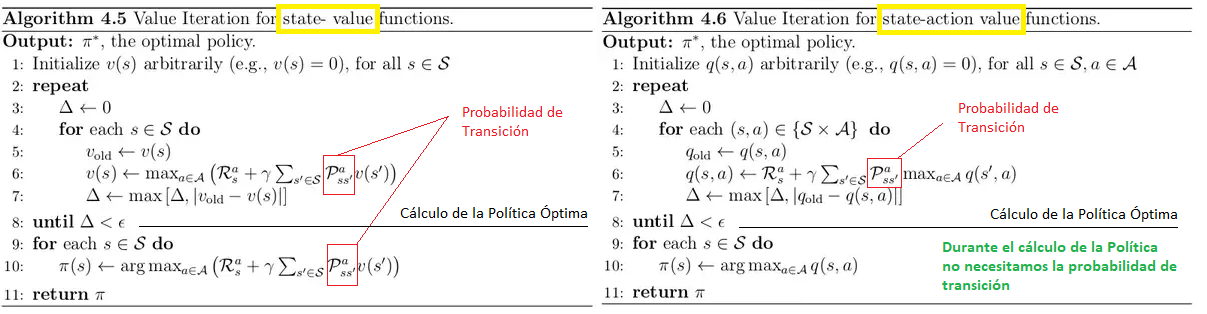

A continuación veremos **un método general para calcular V y Q**.

# Métodos de Programación Dinámica

Para llevar a cabo algoritmos de **Programación Dinámica** necesitamos ser **conocedores absolutos del entorno**: Esto quiere decir que necesitamos la siguiente información antes de comenzar nuestro algoritmo de aprendizaje por refuerzo.

- **Modelo de las acciones**: Saber qué acciones puedo ejecutar en cada estado.
- **Modelo del entorno**: Saber de antemano todos los estados posibles que existen en el entorno.
- **Modelo de las recompensas**: Saber de antemano las recompensas obtenidas en cada transición.
- **Modelo de las distribuciones de probabilidad**: Saber de antemano la probabilidad existente de ir de un estado a otro.

Dentro de estos métodos encontramos dos grandes Ramas:

- **Método de iteración de Políticas** (Policy Iteration)
- **Método de iteración de Valores** (Value Iteration)

En ambos casos el corazón de su funcionamiento radica en utilizar la ecuación de Bellman como una regla para ir actualizando dinámicamente los valores de los estados V o de las acciones Q.

## Iteración de Valores

Hasta ahora hemos visto el caso de entorno unidireccionales que acaban inequívocamente en un estado final, sin emabrgo, veamos el caso de un entorno en el que es posible volver al estado de inicio. Se trata de un entorno infinito, por eso aplicamos un factor de descuento $\gamma = 0.9$. Consta de tan sólo dos estados $s_{1}$ y $s_{2}$ y cada uno de ellos tiene una única transición posible al otro estado, es decir, la secuencia de estados de nuestro agente será [$s_{1}$, $s_{2}$, $s_{1}$, $s_{2}$...]. Las recompensas por ir de $s_{1}$ a $s_{2}$ es de 1 y por volver de $s_{2}$ a $s_{1}$ es de 2, de manera que nuestra secuencia de recompensas será [1,2,1,2...].

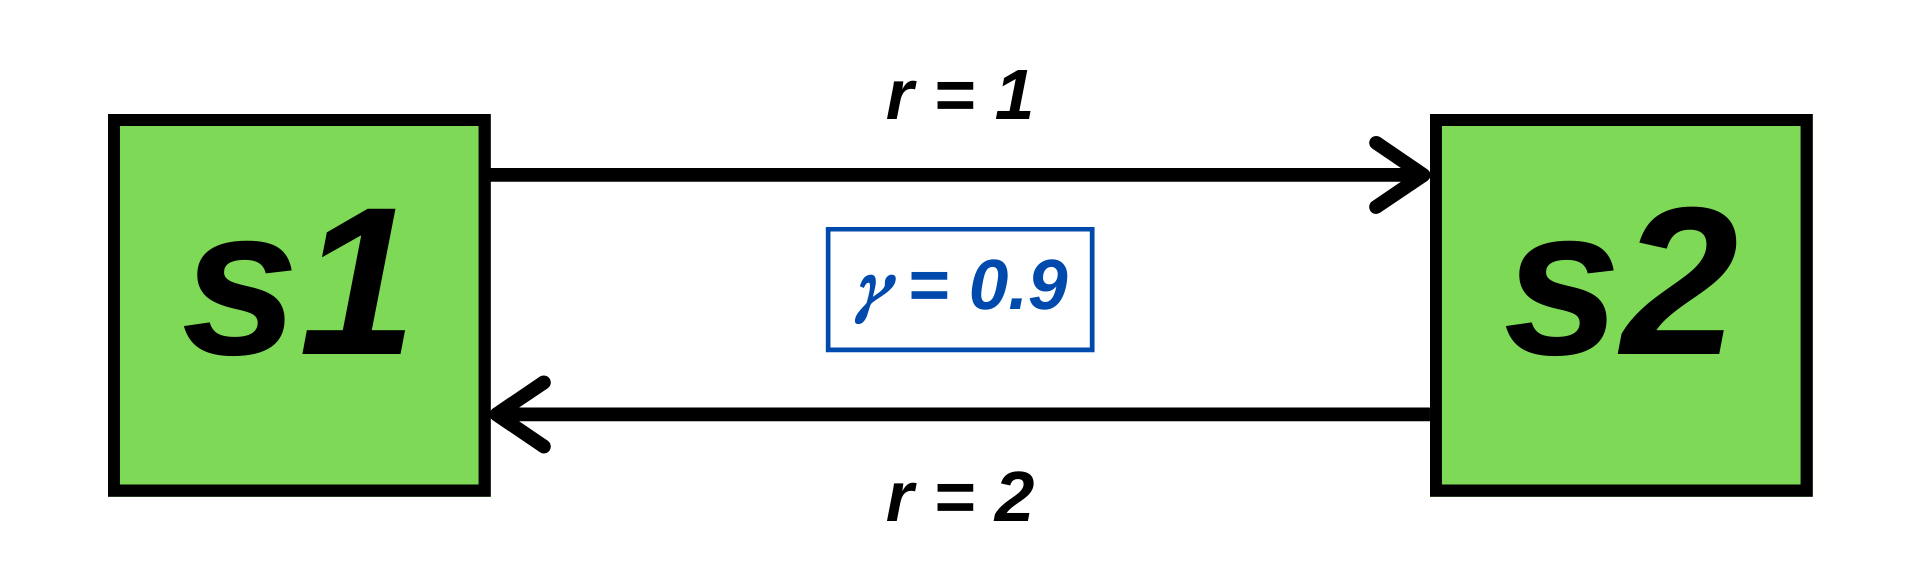

### Fase 1: Cálculo de los Valores de estado

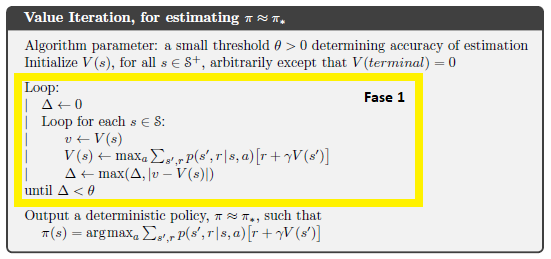

El **primer paso** es inicializar una tabla con los **valores de los estados** a cero.

- $V(s1) = 0$
- $V(s2) = 0$

El **segundo paso** es aplicar la ecuación de Bellman para cada estado en el entorno:

<h3><center>$$V_{s} = \max_{a \in A} \sum_{s \in s} p_{a,s \rightarrow s'}(r_{s,a} + \gamma V_{s'})$$</center></h3>

Puesto que el entorno es determinista (no hay probabilidad de transición) y tan sólo hay una acción posible (la única acción será la "máxima acción") cada transición se puede reducir a su siguiente expresión:

<h3><center>$V_{s} = r_{s, a} + \gamma V_{s'} $</center></h3>

Por tanto, veamos paso a paso cómo se actualiza la estimación de cada estado en cada paso

- **t1** --> $V_{1} = 1 + \gamma V_{2} = 1 + \gamma 0 = 1$
- **t2** --> $V_{2} = 2 + \gamma V_{1} = 2 + \gamma 1 = 2.9$
- **t3** --> $V_{1} = 1 + \gamma V_{2} = 1 + \gamma 2.9 = 1 + 2.61 = 3.61$
- **t4** --> $V_{2} = 2 + \gamma V_{1} = 2 + \gamma 3.61 = 1 + 3.249 = 5.249$
- ..... --> Así sucesivamente

El **tercer paso** es repetir el paso 2 hasta convergencia (hasta que los cambios en las estimaciones de valor sean pequeños).

In [1]:
V1 = 0 #Inicializar el Valor de estado 1 a 0
V2 = 0 #Inicializar el Valor de estado 2 a 0
gamma = 0.9 # factor de descuento
r2 = 1 # recompensa transición del estado 1 al estado 2
r1 = 2 # recompensa transición del estado 2 al estado 1

# Ejecutamos la ecuación de Belmman para actualizar V1 y V2
for _ in range(50):
    V1 = r1 + gamma*V2  
    V2 = r2 + gamma*V1

print("V1:", V1)    
print("V2:", V2)    

V1: 15.262722971246287
V2: 14.73645067412166


Formalmente:


<h3><center>$$V_{1} = \sum_{i=0}^{\infty} 1 \gamma^{2i} + 2\gamma^{2i+1}$$ $$V_{2} = \sum_{i=0}^{\infty} 2 \gamma^{2i} + 1\gamma^{2i+1}$$</center></h3>

In [4]:
# V(s1)
sum([0.9**(2*i) + 2*(0.9**(2*i +1)) for i in range(50)])

14.736450674121663

In [5]:
# V(s2)
sum([2*(0.9**(2*i)) + 0.9**(2*i +1) for i in range(50)])

15.262752483911719

### Fase 2: Cálculo de la Política Óptima

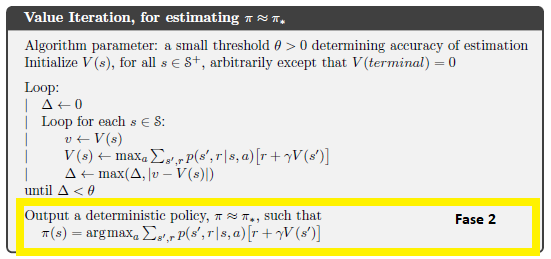

En este caso **la política óptima es la única política posible ya que sólo hay una acción para cada estado**.

Aquí se comprueba rápidamente que, de no incluir el factor de descuento $\gamma$, los valores de los estados tenderían a infinito. Por otro lado os estaréis preguntando: Pero si acabas de decirnos que el cálculo de Q es más útil que el cálculo de V, ¿Por qué vuelves entonces a la ecuación de Bellman y al cálculo de los valores de estado?, muy sencillo, como hemos mencioando antes "el entorno es determinista (no hay probabilidad de transición) y tan sólo hay una acción posible (la única acción será la "máxima acción")", por tanto no hay diferencia entre aplicar value iteration para Q o para V.

# Métodos de las Diferencias Temporales

La primera pregunta es ¿Realmente necesitamos iterar sobre todos los estados del entorno?. Imaginémonos los juegos de Atari que, de hecho, son el estándar para medir la calidad de un algoritmo en Aprendizaje po Refuerzo, Cada frame del juego tiene una resolución de 210 x 160 píxeles y cada píxel puede tomar un valor entre 128 colores. Esto hace que el número total de estados posibles sea la rídicula cantidad de $128^{(210 x 160)}$, ¡tardaríamos miles de millones de años en recorrerlos todos! y la gran mayoría des esas combinaciones ni si quiera se darían nunca en el entorno, lo que sería una gran pérdida de tiempo.

![atari](https://atariage.com/2600/screenshots/s_Basketball_1.png)

Veamos cómo los métodos de diferencias temporales nos permiten superar estos problemas.

#### Antes: Programación Dinámica

La información necesaria que requieren los algoritmos de **Programación Dinámica** era:

- **Modelo de las acciones**: Saber qué acciones puedo ejecutar en cada estado.
- **Modelo del entorno**: Saber de antemano todos los estados posibles que existen en el entorno.
- **Modelo de las recompensas**: Saber de antemano las recompensas obtenidas en cada transición.
- **Modelo de las distribuciones de probabilidad**: Saber de antemano la probabilidad existente de ir de un estado a otro.


#### Ahora: Diferencias Temporales

La información necesaria que requieren los algoritmos de **Diferencias Temporales** es:

- **Modelo de las acciones**: Saber qué acciones puedo ejecutar en cada estado.

Los métodos de las **diferencias temporales** nos permiten **actualizar** los valores de los estados, o en este caso los valores de las acciones para cada estado **Q(s, a)**, **con cada paso que damos en el entorno**, obteniendo de éste tan sólo: **la recompensa del paso realizado y el estado alcanzado con esa acción** (que si recordamos es exactamente lo que nos devuelve el entorno de la libreria Gym). Punto, ya está, no necesitamos conocer las transiciones de probabilidad, no necesitamos conocer cuántos estados hay (*inciso: aquí hacemos algo de trampas porque, si bien no necesitamos conocer los estados de antemano, ya que podemos ir creando una lista con los estados alcanzados según lleguemos a ellos, sí usaremos una lista de todos los estados posibles para crear una tabla de antemano para mayor comodida*) y no necesitamos conocer las recompensas de antemano sino que las iremos "anotando" según aparezcan. Los cuatro grandes métodos de Diferencias temporales son:

- TD(0)
- SARSA
- **Q-learning**
- Actor-Critic



# Q-learning

Uno de los mayroes hitos del Reinforcement Learning fue el desarrollo del algoritmo Q-learning por parte de *Watkins* en 1989. En este caso los valores **Q estado-acción convergen a su forma óptima Q* independientemente de la política** que decidamos seguir (algoritmo off-policy). La política sigue influyendo en qué estados acabaremos tras cada paso ejecutado en el entorno, pero esto no influye en la convergencia a Q* (*disclaimer: esto se da, con probabilidad 1, siempre y cuando hayamos explorado todos los estados*).

<h2><center>$$Q(S_{t}, A_{t}) \leftarrow Q_(S_{t}, A_{t}) + \alpha[R_{t+1} + \gamma max_{a}Q(S_{t+1}, a) - Q(S_{t}, A_{t}) ]$$</center></h2>

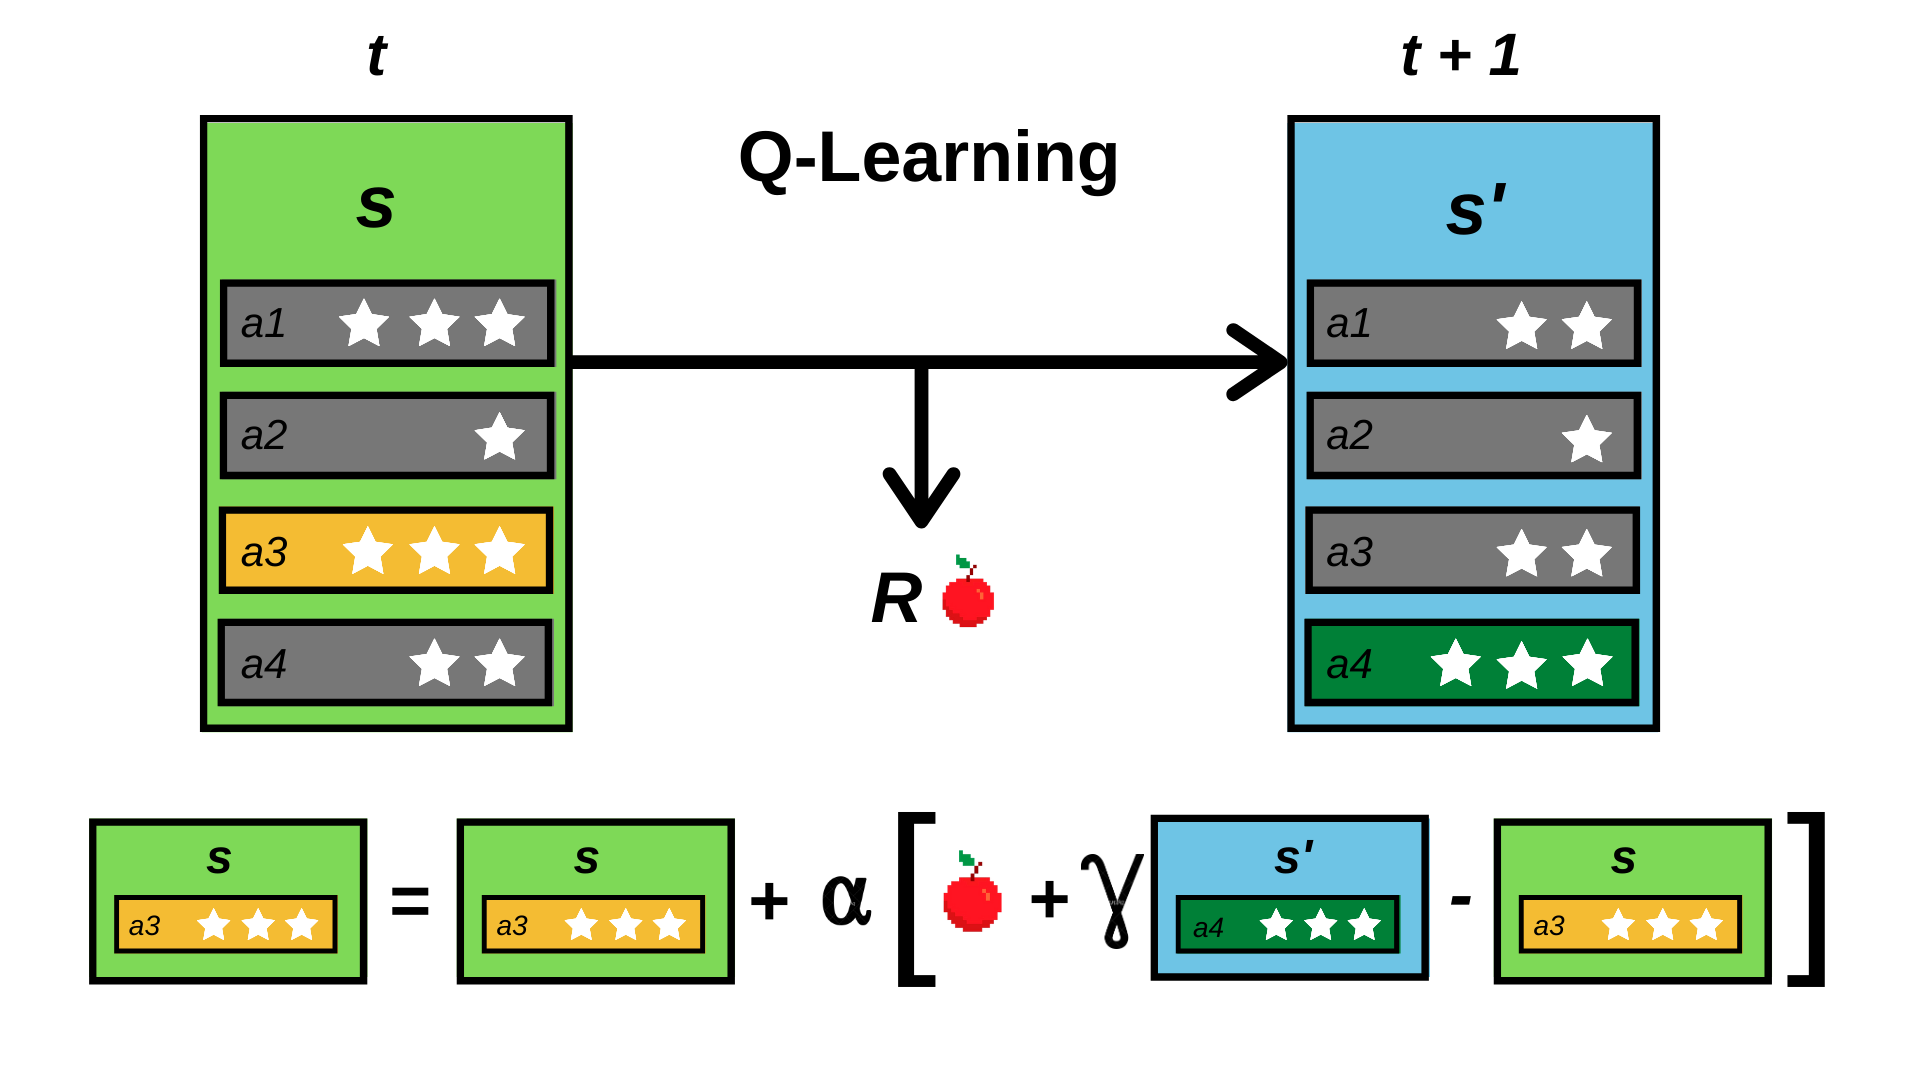

Aquí introducimos por primera vez el concepto $\alpha$ o **learning rate**, que básicamente determina cuán de importante es la nueva estimación de Q frente a la que teníamos previamente. Después de cada paso (t+1) obtenemos una recompensa *R* a la cual sumanos el valor Q(s, a) más alto del estado alcanzado y le restamos el valor Q(s, a) del estado que hemos abandonado.

**IMPORTANTE: La acción elegida en el estado s puede ser, O NO, la acción con mayor Q.**, si elegimos, o no, la acción con mayor valor dependerá de la política (la cual, como hemos dicho, no influye en la convergencia), y nosotros vamos a aplicar la política epsilon-greedy.

**Q learning desgranado:**

<br>
<br>

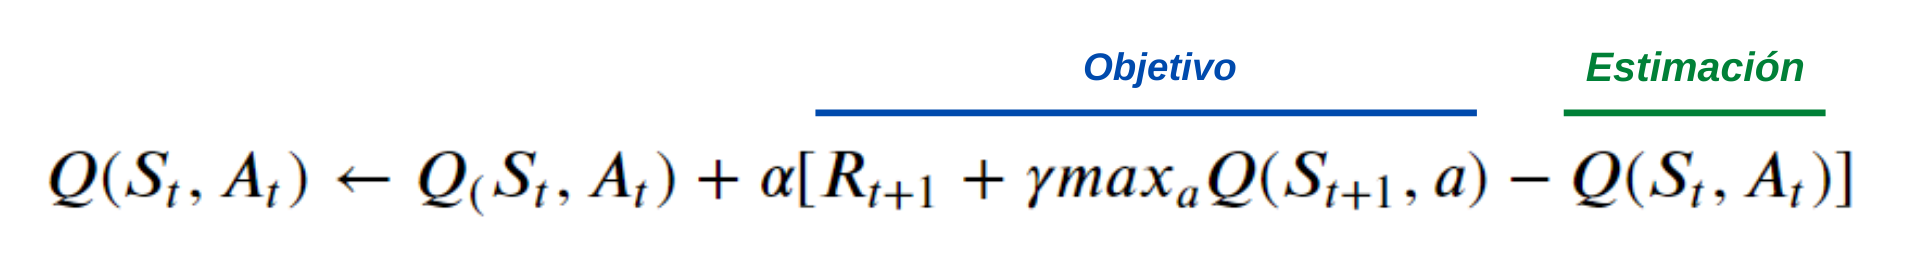

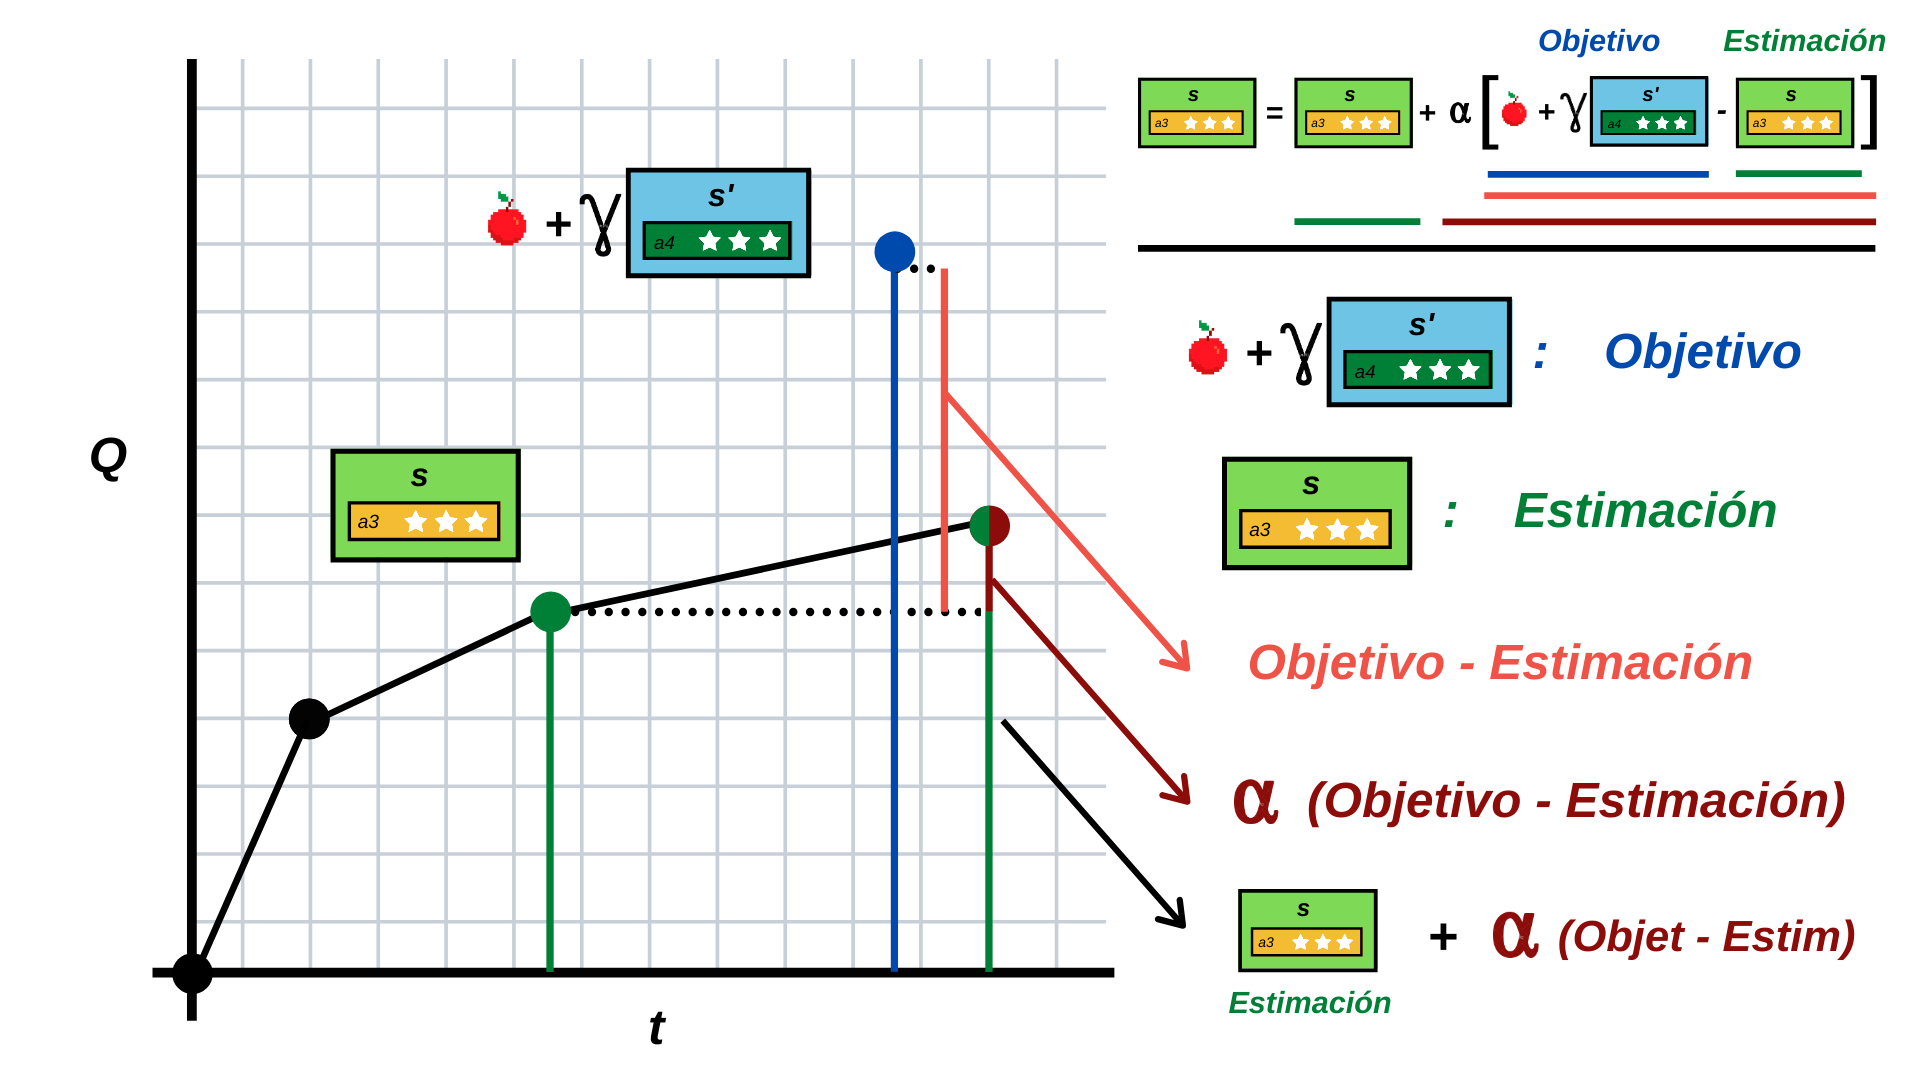

<br>
<br>

En la figura anterior se puede apreciar cuál es el rol de cada uno de los parámetros de nuestra ecuación Q-learning. Al parámetro $R_{t+1} + \gamma max_{a}Q(S_{t+1}, a)$ se le conoce como **Objetivo** y recibe ese nombre precisamente porque es la "percepción actualizada" que tenemos del estado que acabamos de abandonar y por tanto "donde nos queremos dirigir", sin embargo, preferimos "ser precavidos" y antes que actualizar Q(s, a) (que es la percepción actual que tenemos del estado --> es decir, su **estimación**) exactamente con el valor objetivo lo que hacemos es que aplicamos un valor de "blending", (traducción: valor de mezcla) **$\alpha$** llamado ***learning rate***, entre ese valor **objetivo** y la **estimación** que tenemos ahora mismo de ese estado. (**OJO:** yo lo llamo estimación porque me parece un concepto más acertado para lo que queremos describir, pero en la literatura anglosajona se le conoce como **Predicción**)

<br>
<br>

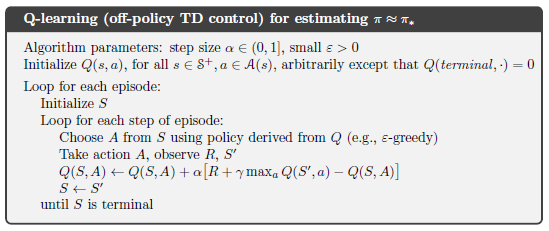


### Política $\epsilon$-greedy

Hagamos un paréntesis. En la primera clase vimos que en aprendizaje por Refuerzo es muy importante el **equilibrio entre exploración y explotación**. Esto básicamente es: ¿voy al mismo restaurante de siempre que me gusta, o elijo uno nuevo para ver si este restaurante nuevo me gusta mas/?. Y en aprendizaje por refuerzo se expresa a través de las políticas $\epsilon-greedy$.

Una política **greedy**, o política "codiciosa", pos su traducción en inglés, es aquella que elige siempre la acción con mayor Q sea cual sea el estado, es decir, **explotamos** la información que ya tenemos, vamos siempre al mismo restaurante que nos gusta. En el polo opuesto tendríamos una política **random**, o política aleatoria, en la que sea cual sea el estado en el que nos encontremos elegimos una de las acciones disponibles al azar, es decir, **exploramos** nueva información. 

La **combinación** de una política greedy y una política random da como resultado la política **$\epsilon-greedy$**. Esta política consiste en elegir un $\epsilon$ % de las veces una acción aleatoria y un (1 - $\epsilon$) % de las veces la acción con mayor Q.

# Q-learning code

In [4]:
import gym
from collections import defaultdict
from numpy import argmax
from random import random

GAMMA = 0.9
ALPHA = 0.1
EPSILON = 0.5
EPISODES = 20000

q_values = defaultdict(float)

env = gym.make("FrozenLake-v0", is_slippery=True)

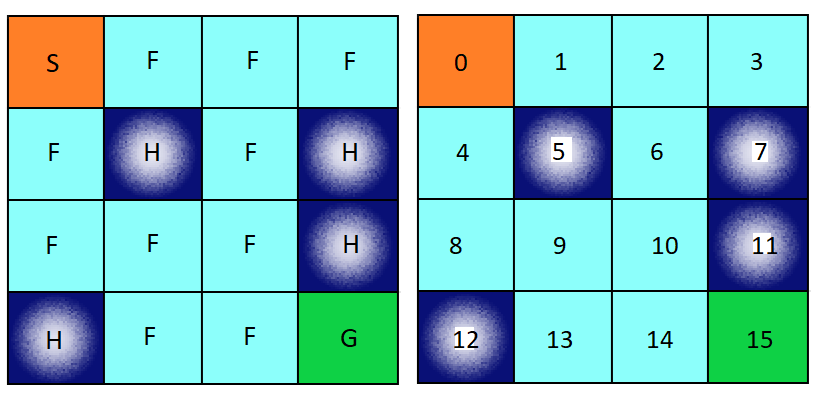

In [5]:
def select_action_and_value(state):
    
    '''
    Elegimos una acción según la política epsilon-greedy
    @ state: int -> estado para el que elegimos la acción a tomar
    '''
    # EPSILON: Politica RANDOM
    if random() < EPSILON:
        #Random Action.
        action, q_value_action = select_random_action_and_value(state)


    # (1 - EPSILON): Política GREEDY 
    else:
        # Acción Greedy
        action, q_value_action = select_best_action_and_value(state)


    return action, q_value_action    
        
def select_best_action_and_value(state):
        
    '''
    Elegimos una acción según la política greedy, la acción con mayor Q
    @ state: int -> estado para el que calculamos la mejor acción y su Q
    '''
    
    posible_actions = range(env.action_space.n) # [0,1,2,3]
    q_values_state = [q_values.get((state, action), 0.0) for action in posible_actions] # Lista de Q para el estado

    best_action = argmax(q_values_state) # La acción con el Q más alto: integer 0,1,2,3
    best_q_value = q_values_state[best_action] # El Q (más alto) de la mejor acción para este estado
    
    return best_action, best_q_value

def select_random_action_and_value(state):
    
    '''
    Elegimos una acción según la política random
    @ state: int -> estado para el que calculamos la acción random y su Q
    '''
    
    random_action = env.action_space.sample() # Accion elegida en el estado actual
    q_random_action = q_values.get((state, random_action), 0.0) # Q para la acción elegida en el estado actual
    
    return random_action, q_random_action

In [6]:
for e in range(EPISODES):
    
    is_episode_done = False
    actual_state = env.reset()

    while not is_episode_done:


        '''
        Elegimos una acción para el estado actual según la política epsilon-greedy
        '''
        selected_action, q_actual_state_action = select_action_and_value(actual_state)


        '''
        Ejecutamos la acción y obtenemos la RECOMPENSA y el ESTADO ALCANZADO
        Con el ESTADO ALCANZADO obtenemos la Q más alta para ese estado
        '''
        new_state, reward, is_episode_done, _ = env.step(selected_action)


        # Obtener Q de la mejor acción para el estado alcanzado
        _, q_new_state_best_action = select_best_action_and_value(new_state)


        '''
        Actualizamos Q(S, a) siguiendo el algoritmo Q-learning

        S: estado actual, actual_state
        S': estado alcanzado, new_state
        a: accion elegida, selected_action
        r: recompensa, reward
        q_s_a: Q de la accion elegida en el estado actual, q_actual_state_action
        q_max_s': Q más alto del estado alcanzado, q_new_state_best_action 
        gamma: factor de descuento, GAMMA
        alpha: learning rate, ALPHA
        '''

        new_value = q_actual_state_action + ALPHA*(reward + GAMMA*q_new_state_best_action - q_actual_state_action)

        q_values[(actual_state, selected_action)] = new_value

        actual_state = new_state


## Print Q-values

In [7]:
import matplotlib.pyplot as plt
from matplotlib import colors

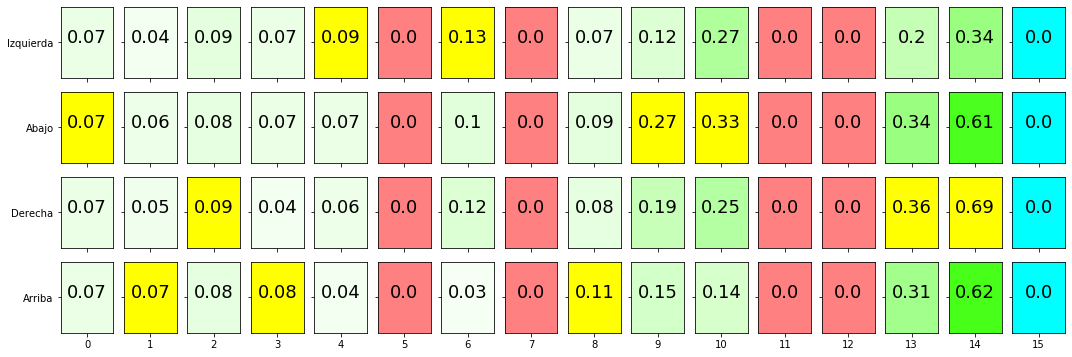

In [9]:
# creamos la figura de matplotlib
fig, ax = plt.subplots(4, 16, sharex='col', sharey='row', figsize=(18, 6))

# Diccionario traduccion, accion - texto
movs = {
    0: 'Izquierda',
    1: 'Abajo',
    2: 'Derecha',
    3: 'Arriba'
}

# Por cada estado
for c in range(16):
    
    # Por cada accion
    for r in range(4):
        
        # Tomamos el valor de cada accion / estado
        value = round(q_values.get((c, r), 0.0), 2)
        
        # Escribimos el valor en la celda
        ax[r, c].text(0.5, 0.5, str(value),
                      fontsize=18, ha='center')
        
        # Normalizamos la saturación respecto al valor más alto de la tabla q
        saturation = value/round(max(q_values.values()), 2)
        # Cuanto más alto Q más verde
        color = colors.hsv_to_rgb((0.3, saturation, 1))
        
        # Si es la mejor acción colorear de amarillo
        act, _ = select_best_action_and_value(c)
        if act == r:
            color = (1,1,0)
        
        # si es un con valor 0 colorear de rojo
        if value == 0.0:
            color = (1, 0.5, 0.5)
        
        # si es un estado final objetivo (columna 15) colorear de azul
        if c == 15:
            color = (0, 1, 1)
        
        # Editar el texto de los ejes x e y
        ax[r, c].set_facecolor(color)
        ax[r, c].set_yticks([0.5])
        ax[r, c].set_yticklabels([movs[r]])
        ax[r, c].set_xticks([0.5])
        ax[r, c].set_xticklabels([c])
        
            

<img src="resources/frozenlake.png" width=500 />